<a href="https://colab.research.google.com/github/xiaonanY0317/527-Project/blob/main/527_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

Import data

In [ ]:
data_url = "https://drive.google.com/uc?id={}".format("1QQr8WzF21yb2Z7N1vmf2Sqsx_mU2TPJZ")
data = pd.read_csv(data_url)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
for column in data.columns:
    print(f"{column}: Number of unique values {data[column].nunique()}", "\n")

Age: Number of unique values 43 

Attrition: Number of unique values 2 

BusinessTravel: Number of unique values 3 

DailyRate: Number of unique values 886 

Department: Number of unique values 3 

DistanceFromHome: Number of unique values 29 

Education: Number of unique values 5 

EducationField: Number of unique values 6 

EmployeeCount: Number of unique values 1 

EmployeeNumber: Number of unique values 1470 

EnvironmentSatisfaction: Number of unique values 4 

Gender: Number of unique values 2 

HourlyRate: Number of unique values 71 

JobInvolvement: Number of unique values 4 

JobLevel: Number of unique values 5 

JobRole: Number of unique values 9 

JobSatisfaction: Number of unique values 4 

MaritalStatus: Number of unique values 3 

MonthlyIncome: Number of unique values 1349 

MonthlyRate: Number of unique values 1427 

NumCompaniesWorked: Number of unique values 10 

Over18: Number of unique values 1 

OverTime: Number of unique values 2 

PercentSalaryHike: Number of uni

From above, We can tell that the dataset have several object datatype columns(Categorical data). So we need to clean them. And we can know that column StandardHours, Over18, EmployeeCount only have 1 values and EmployeeNumber is unique to every row. Thus we don't need these column.


Pre-cleaning *data*



In [ ]:
# drop columns with only one valaue and with unique value to every row.
data.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

In [ ]:
# find out categorical columns
num_cols = data._get_numeric_data().columns
cat_cols = list(set(data.columns) - set(num_cols))

In [ ]:
# convert categorical data into numerical
lable = LabelEncoder()
data["Attrition"] = lable.fit_transform(data["Attrition"])

Check the relationship between categorical data and Attrition

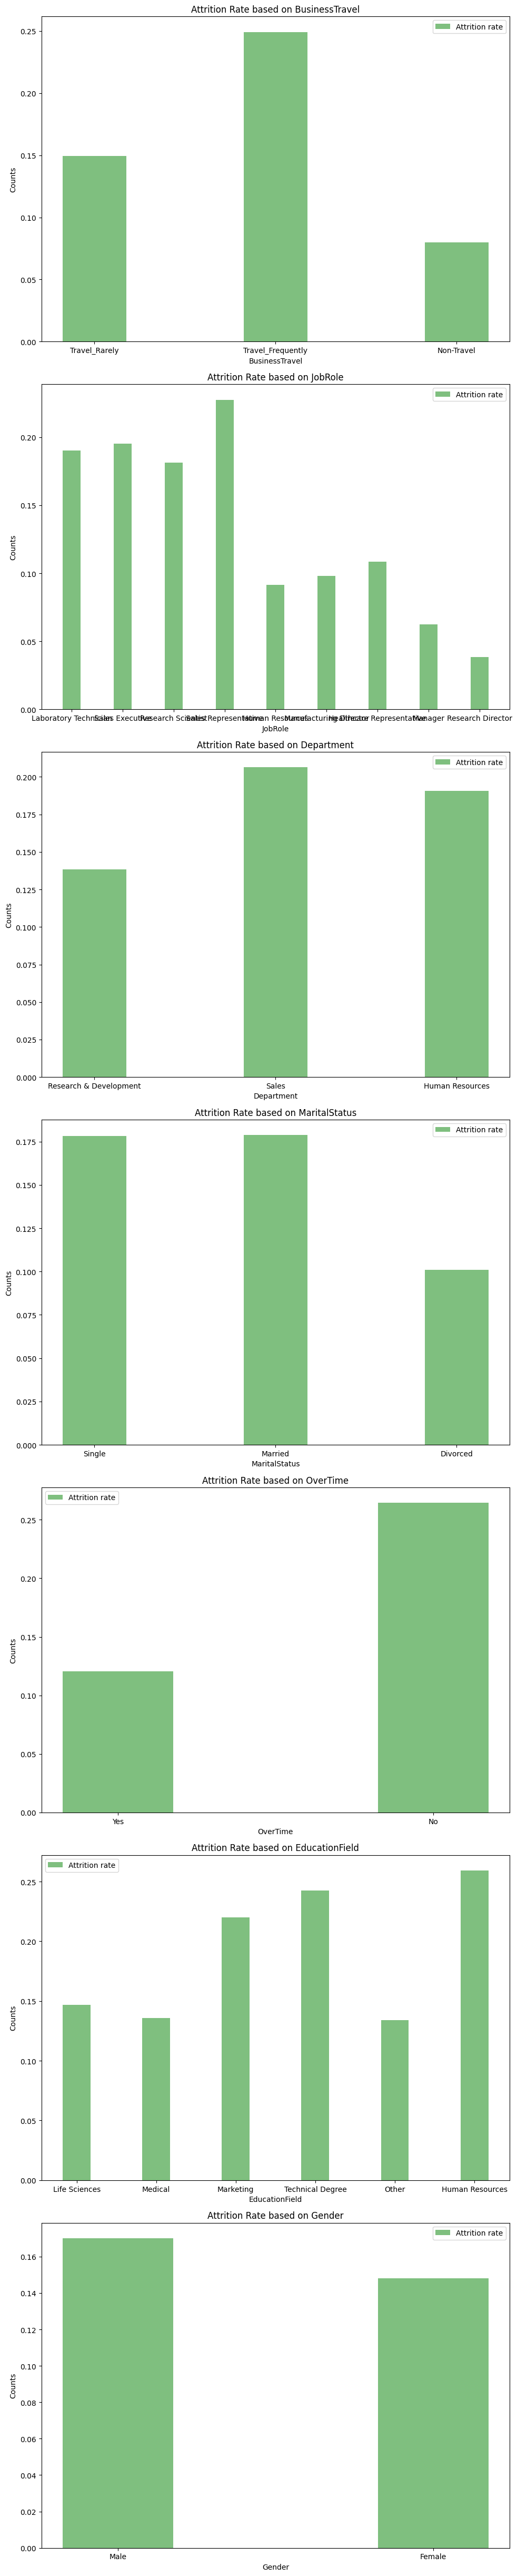

['BusinessTravel',
 'JobRole',
 'Department',
 'MaritalStatus',
 'OverTime',
 'EducationField',
 'Gender']

In [ ]:
# draw histogram to see if these categorical data have relationship with Attrition
Attrition_yes = data[data["Attrition"] == 1]
Attrition_no = data[data["Attrition"] == 0]
fig, axes = plt.subplots(nrows=len(cat_cols), ncols=1, figsize=(10, 7*len(cat_cols)))
i=0
for col in cat_cols:
  if i < len(cat_cols):
    value_yes = Attrition_yes[col].value_counts()
    value_no = Attrition_no[col].value_counts()
    rate_yes = value_yes.values/data[col].value_counts().values
    ax = axes[i]
    ax.bar(value_yes.index,rate_yes , label='Attrition rate', width=0.35,alpha=0.5, color = 'green')
    ax.set_xlabel(col)
    ax.set_ylabel('Counts')
    ax.set_title(f'Attrition Rate based on {col}')
    ax.legend()
    i = i+1
plt.tight_layout()
plt.show()
cat_cols

<ipython-input-162-043e19c4093e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})


<Axes: >

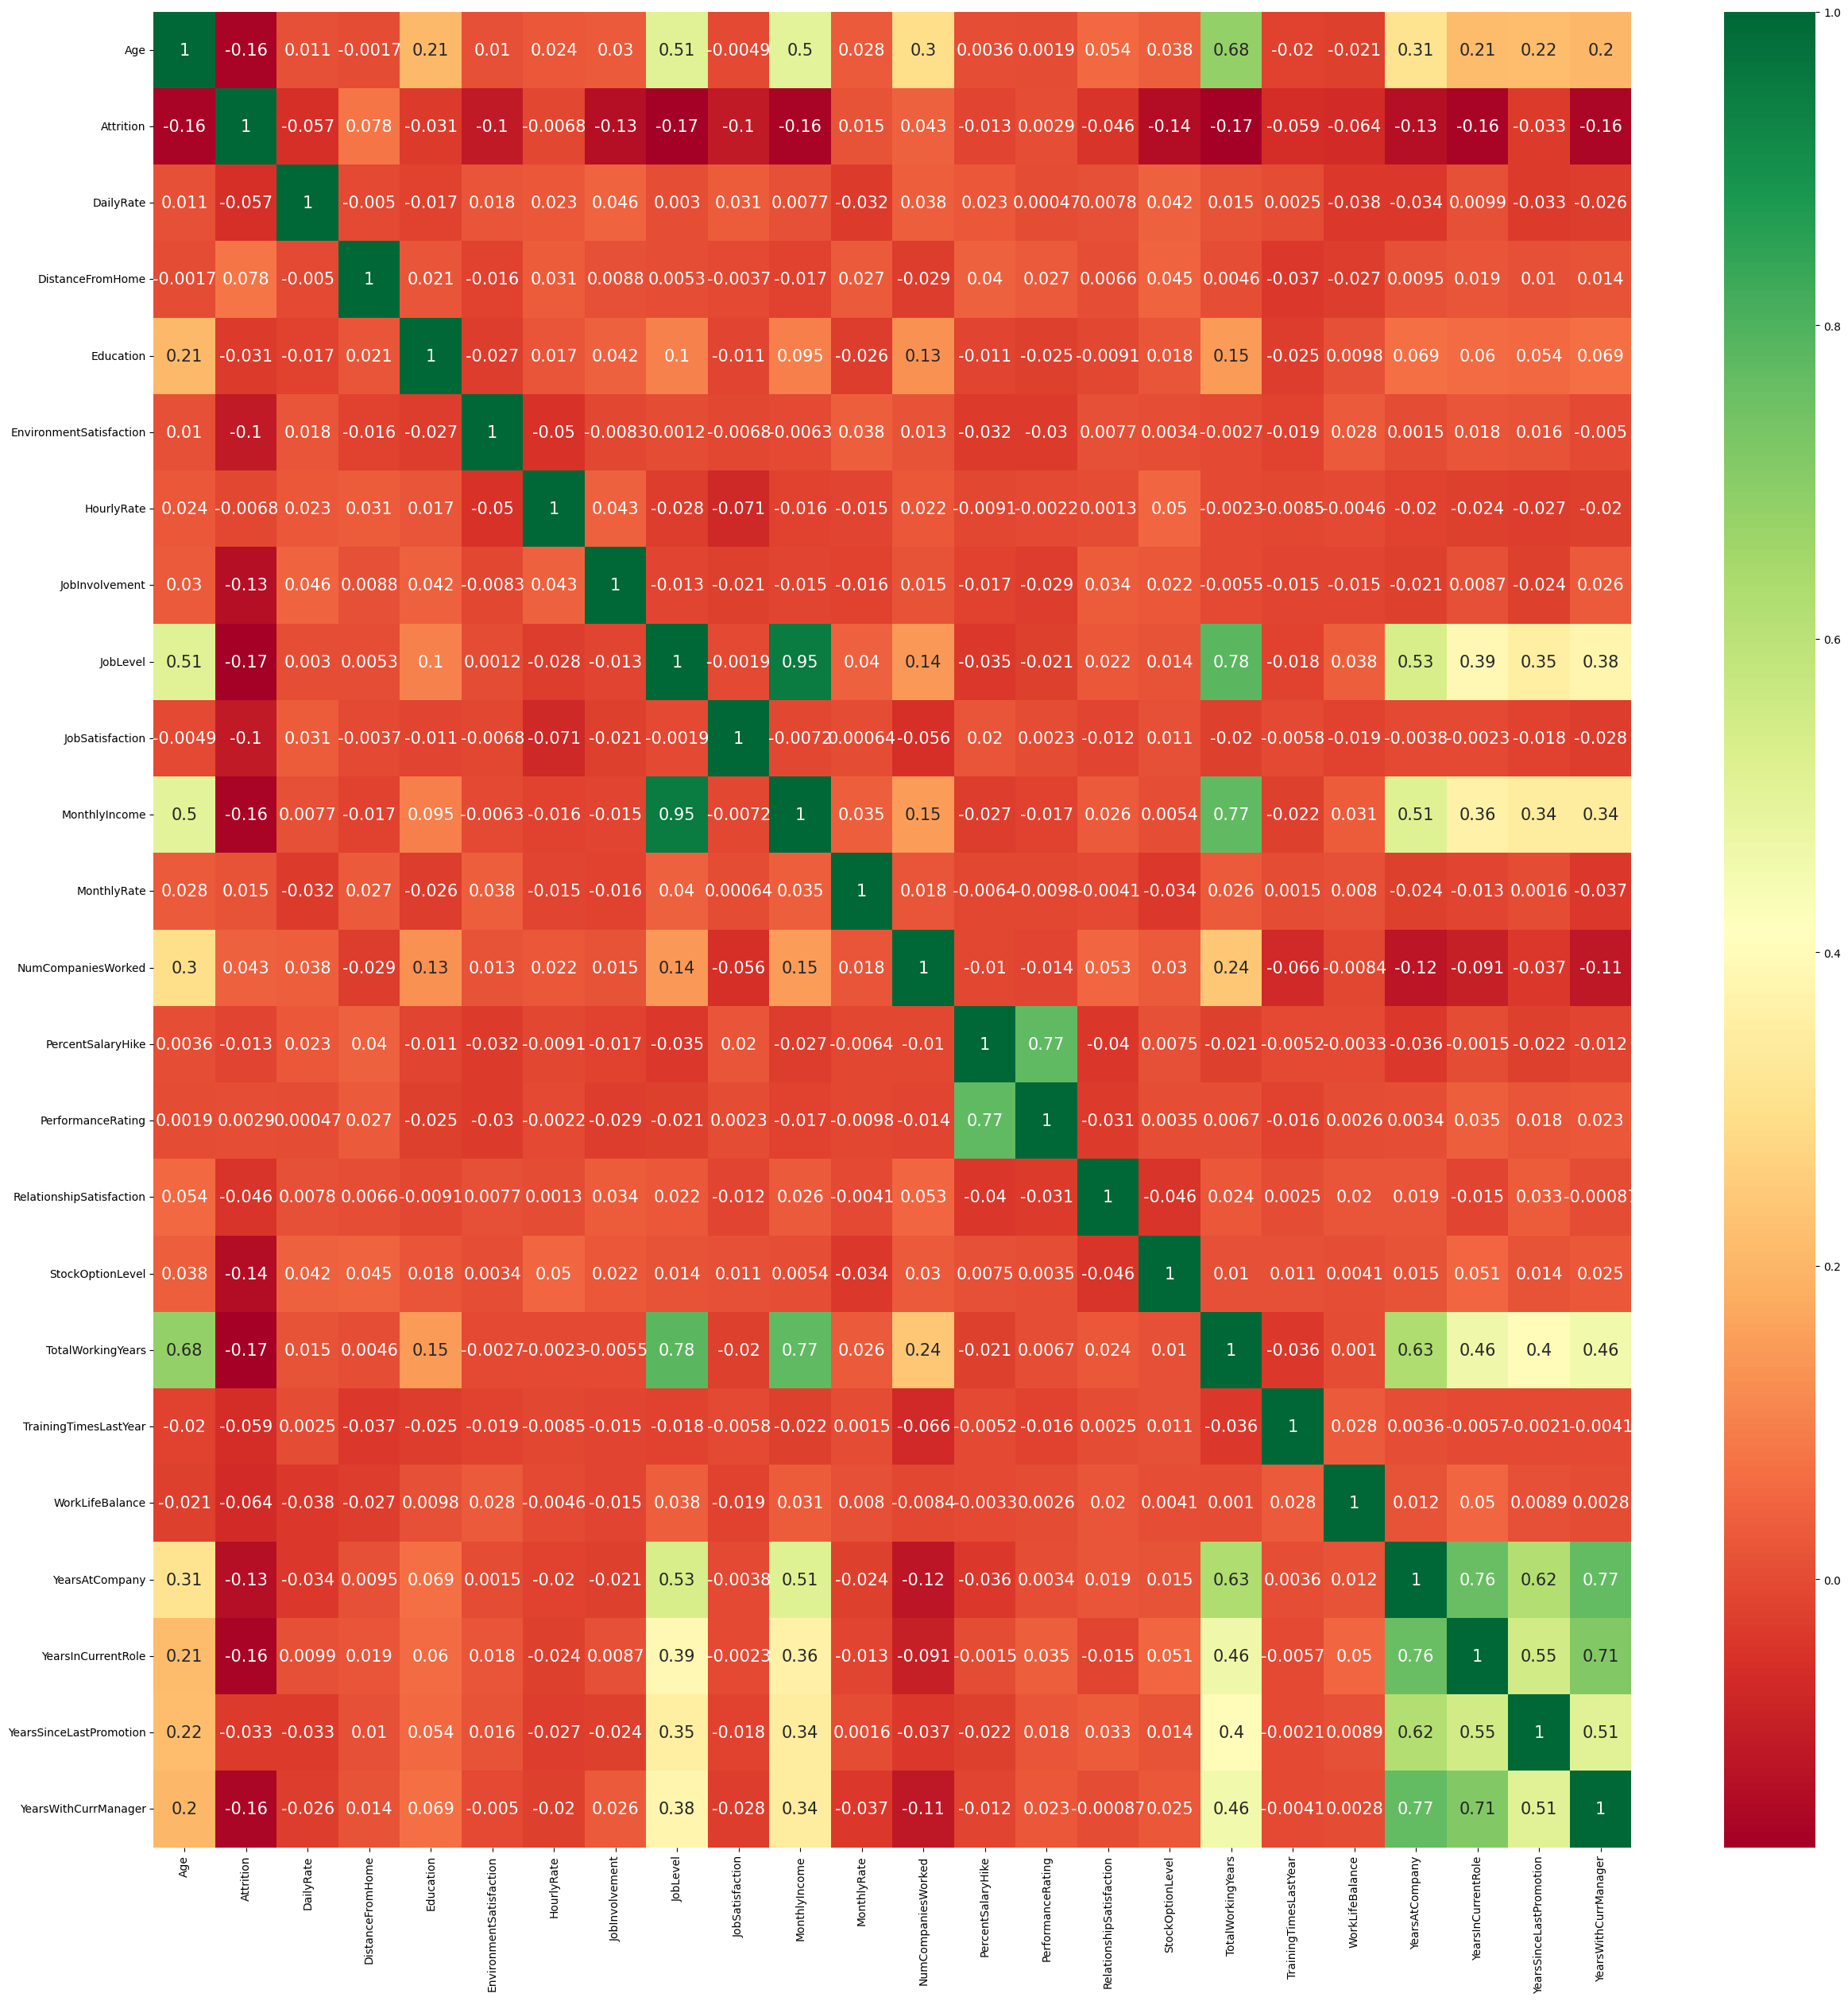

In [ ]:
`                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               `                  # Covariance between heatmap and numerical data
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})